# Material de aula  - Aprendizado de Máquina

Instruções para a realização desta atividade:

1. Faça o download deste notebook Jupyter para sua estação de trabalho
2. Realize as atividades solicitadas dentro do notebook, nos espaços apropriados e indicados
3. Salve o notebook no seguinte padrão: <nome_sobrenome_RA>.ipynb (por exemplo: **rodrigo_caropreso_123456.ipynb ** )
4. Envie o notebook com a atividade realizada na sala de aula da disciplina (Google Classroom)

** DATA DE ENTREGA DESTA ATIVIDADE: 15/12/2018 **

** VALOR DESTA ATIVIDADE: 1,0 ponto **


## <center> Exercício 1 - Perceptron e Regra de Aprendizado de Hebb </center>

### A partir da análise de um processo de destilação fracionada de petróleo observou-se que determinado óleo poderia ser classificado em duas classes de pureza {C1 e C2}, mediante a medição de três grandezas {x1, x2 e x3} que representam algumas das propriedades físico-químicas do óleo. 

### A equipe de engenheiros e cientistas pretende utilizar um perceptron para executar a classificação automática destas duas classes.

### Assim, baseadas nas informações coletadas do processo, formou-se o conjunto de treinamento em anexo, tomando por convenção o valor –1 para óleo pertencente à classe C1 e o valor +1 para óleo pertencente à classe C2. 

### Portanto, o neurônio constituinte do perceptron terá três entradas e uma saída, conforme a figura abaixo:

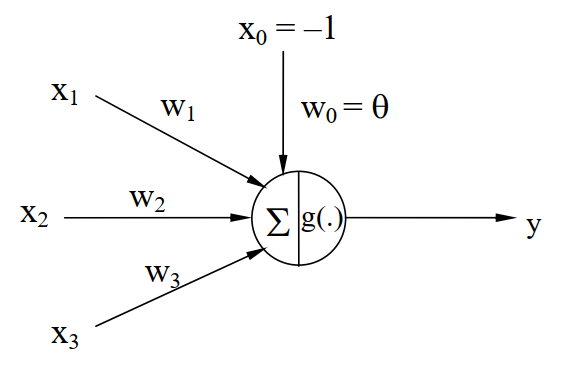


*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina de Sistemas Inteligentes – USP São Carlos, 2012

### Utilizando o algoritmo supervisionado de Hebb (regra de Hebb) para classificação de padrões, e assumindo-se a taxa de aprendizagem igual a 0.01, faça as seguintes atividades:

In [1]:
#CÉLULA PERCEPTRON-LIB-01
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#CÉLULA PERCEPTRON-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [3]:
#CÉLULA PERCEPTRON-LIB-03
# Função para cálculo de normalização de uma amostra
def tales(x1, x1_min, x1_max, x2_min, x2_max) :
    '''
    Esta função faz o escalamento de 1 amostra x1, que pertence ao intervalo [x1_min, x1_max], 
    dentro do intervalo [x2_min, x2_max]
    
    Parametros
    -----------
    x1     -> valor a ser normalizado
    x1_min -> valor minimo atingido por x1
    x1_max -> valor maximo atingido por x1
    x2_min -> valor minimo da escala de destino
    x2_max -> valor maximo da escala de destino    
    
    Retorno
    -----------  
    valor de x1, que pertence ao intervalo [x1_min, x1_max], projetado dentro do intervalo [x2_min, x2_max]
    '''
   
    #Teorema de Tales
    # ( x2 - x2_min ) / ( x2_max - x2_min ) = ( x1 - x1_min ) / (x1_max - % x1_min);
    
    #Definindo x1 como a escala do vetor dado e x2 como a escala de saída (variavel de interesse), isola-se x2:
    x2 = ( ( x1 - x1_min ) / (x1_max - x1_min) )* ( x2_max - x2_min ) + x2_min
    
    return x2

In [4]:
#CÉLULA PERCEPTRON-LIB-04
def scale(x2_min, x2_max, sampleArray) :
    '''
    Esta função faz o escalamento de 1 vetor de amostras para dentro do intervalo [x2_min, x2_max]
    Ela retorna um vetor com os dados normalizados dentro do dominio dado
    
    Parametros
    -----------
    x2_min      -> valor minimo da escala de destino
    x2_max      -> valor maximo da escala de destino
    sampleArray -> vetor a ser normalizado   
    
    Retorno
    -----------  
    vetor sampleArray projetado dentro do intervalo [x2_min, x2_max]   
    '''    
    x_max = max(sampleArray)
    x_min = min(sampleArray)
    
    sampleArrayNorm = [tales(x, x_min, x_max, x2_min, x2_max) for x in sampleArray]
    
    return sampleArrayNorm

In [5]:
#CÉLULA PERCEPTRON-LIB-05
def perceptron_train(eta, vInputs, vOutputs, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta        -> taxa de aprendizado
    inputs     -> vetor/matriz com as entradas
    outputs    -> vetor/matriz com as saidas
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
        
    # nInputs rows x 1 colum
    vWeights = np.random.rand(nInputs, 1)
    #print('Pesos inicializados:')
    #print(vWeights)
    vWeightsIni=vWeights
    
    correction = True
    for epochCounter in range(max_epochs) :
        
        if(correction == False) :
            break
        
        correction = False #Flag de parada
        for k in range(nSamples) :
            #Com esta notação, pegaremos a coluna k no formato de vetor-coluna vInputs[:, [k]]
            #Com esta notação, pegaremos a coluna k no formato de vetorlinha vInputs[:, k]
            x = vInputs[:, [k]]
            
            #Calcula saída do perceptron
            u = np.matmul(vWeights.T, x)
            y = np.sign(u)
            #Verifica erro 
            d = vOutputs[k]
            if(d != y) :
                #Corrige pesos
                vWeights += eta * (d - y) * x
                correction = True
    
    return (vWeightsIni,vWeights, epochCounter-1)

In [6]:
#CÉLULA PERCEPTRON-LIB-06

def perceptron_operation(vWeights, vInputs) :
    '''Algoritmo de operação do Perceptron Simples
    
    Parametros
    -----------
    vWeights : vetor/matriz com os pesos
    inputs   : vetor/matriz com as entradas
    
    Retorno
    -------
    Este método retorna o valor de saída do perceptron calculado segundo sua função de ativação signal(.)    
    ''' 

    x = vInputs

    #Calcula saída do perceptron
    u = np.matmul(vWeights.T, x)
    y = np.sign(u)
    
    return np.asscalar(y) #converte o numpy array 1x1 em um unico valor escalar.

## PERCEPTRON - inicio

In [7]:
#CÉLULA PERCEPTRON-MAIN-01

#Parâmetros
eta = 0.01
nInputs = 3
max_epochs = 1000

#Carrega dados - Treino
dfTrainingFile = loadDataFile('Lab01_training.csv')

dfTrainingFileNorm = dfTrainingFile
dfTrainingFileNorm['x1'] = scale(-1,1, dfTrainingFile['x1'])
dfTrainingFileNorm['x2'] = scale(-1,1, dfTrainingFile['x2'])
dfTrainingFileNorm['x3'] = scale(-1,1, dfTrainingFile['x3'])

nSamples = len (dfTrainingFileNorm['x1'])

col0 = np.ones((nSamples, 1)) * (-1)
col1 = dfTrainingFileNorm['x1'].values.reshape(nSamples, 1)
col2 = dfTrainingFileNorm['x2'].values.reshape(nSamples, 1)
col3 = dfTrainingFileNorm['x3'].values.reshape(nSamples, 1)

vInputs = np.array(col0)
vInputs = np.append(vInputs, col1, axis=1) #axis = 1 -> coluna
vInputs = np.append(vInputs, col2, axis=1) #axis = 1 -> coluna
vInputs = np.append(vInputs, col3, axis=1) #axis = 1 -> coluna

vOutputs = dfTrainingFileNorm['d'].values.reshape(nSamples, 1)

(vWeightsIni,vWeights, nEpochs) = perceptron_train(eta, vInputs.T, vOutputs, max_epochs)

print(nEpochs)
print(vWeights)

74
[[-0.01468084]
 [ 0.26457382]
 [ 0.14962042]
 [-0.32561731]]


In [8]:
#Verifica resultados 

y=[]
for k in range(nSamples):
    y.append(perceptron_operation(vWeights, vInputs[[k], :].T))

dfValidation = dfTrainingFile.copy()
dfValidation['y'] = y

results = dfValidation['y'] == dfValidation['d']
accuracy = sum(results) / len(results) * 100

print('Taxa de acerto do conjunto de treinamento: {}%'.format(accuracy))

Taxa de acerto do conjunto de treinamento: 100.0%


In [9]:
#Carrega dados - Teste
dfTestFile = loadDataFile('Lab01_operation.csv')
dfTestFileNorm = dfTestFile.copy()

dfTestFileNorm['x1'] = scale(-1,1, dfTestFileNorm['x1'])
dfTestFileNorm['x2'] = scale(-1,1, dfTestFileNorm['x2'])
dfTestFileNorm['x3'] = scale(-1,1, dfTestFileNorm['x3'])

nSamples = len (dfTestFileNorm['x1'])

col0 = np.ones((nSamples, 1)) * (-1)
col1 = dfTestFileNorm['x1'].values.reshape(nSamples, 1)
col2 = dfTestFileNorm['x2'].values.reshape(nSamples, 1)
col3 = dfTestFileNorm['x3'].values.reshape(nSamples, 1)

vTestInputs = np.array(col0)
vTestInputs = np.append(vTestInputs, col1, axis=1) #axis = 1 -> coluna
vTestInputs = np.append(vTestInputs, col2, axis=1) #axis = 1 -> coluna
vTestInputs = np.append(vTestInputs, col3, axis=1) #axis = 1 -> coluna

y=[]
for k in range(nSamples):
    y.append(perceptron_operation(vWeights, vInputs[[k], :].T))

print(y)

[-1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0]


In [10]:
#Cálculo de taxa de acerto
dfTestFile['y'] = y

classes = [ 'C1' if(x==-1) else 'C2' for x in y]
dfTestFile['classes'] = classes

#Exibe o dataframe com entradas e saidas classificadas
dfTestFile

,x1,x2,x3,y,classes
0,-0.3565,0.0620,5.9891,-1.0,C1
1,-0.7842,1.1267,5.5912,-1.0,C1
2,0.3012,0.5611,5.8234,-1.0,C1
3,0.7757,1.0648,8.0677,1.0,C2
4,0.1570,0.8028,6.3040,1.0,C2
5,-0.7014,1.0316,3.6005,-1.0,C1
6,0.3748,0.1536,6.1537,1.0,C2
7,-0.6920,0.9404,4.4058,-1.0,C1
8,-1.3970,0.7141,4.9263,1.0,C2
9,-1.8842,-0.2805,1.2548,1.0,C2


## Atividades:

1 - Execute 5 treinamentos para a rede perceptron, inicializando-se o vetor de pesos em cada treinamento com valores aleatórios entre zero e um. Se for o caso, reinicie o gerador de números aleatórios em cada treinamento de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.

2 - Registre os pesos dos treinamentos na tabela abaixo;
resposta abaixo

3 - Após o treinamento do perceptron, aplique então o mesmo na classificação automática de novas amostras de óleo, indicando-se na tabela seguinte os resultados das saídas (Classes) referentes aos cinco processos de treinamento realizados no item 1.

resposta abaixo

In [17]:
#RESPOSTA 1 E 2
pd.set_option('mode.chained_assignment', None)
d = {'T': ['T1', 'T2','T3','T4','T5'], 'w0 inicial': [0.0, 0.0, 0.0, 0.0 ,0.0], 'w1 inicial': [0.0, 0.0, 0.0, 0.0 ,0.0],'w2 inicial': [0.0, 0.0, 0.0, 0.0 ,0.0],'w3 inicial': [0.0, 0.0, 0.0, 0.0 ,0.0],'w0 final': [0.0, 0.0, 0.0, 0.0 ,0.0], 'w1 final': [0.0, 0.0, 0.0, 0.0 ,0.0],'w2 final': [0.0, 0.0, 0.0, 0.0 ,0.0],'w3 final': [0.0, 0.0, 0.0, 0.0 ,0.0],'Epocas': [0, 0,0,0,0]}
df = pd.DataFrame(data=d)
for i in range(df.shape[0]):
    (vWeightsIni,vWeights, nEpochs) = perceptron_train(eta, vInputs.T, vOutputs, max_epochs)
    df['w0 inicial'][i] = vWeightsIni[0][0]
    df['w1 inicial'][i] = vWeightsIni[1][0]
    df['w2 inicial'][i] = vWeightsIni[2][0]
    df['w3 inicial'][i] = vWeightsIni[3][0]
    df['w0 final'][i] = vWeights[0][0]
    df['w1 final'][i] = vWeights[1][0]
    df['w2 final'][i] = vWeights[2][0]
    df['w3 final'][i] = vWeights[3][0]
    df['Epocas'][i] = nEpochs

df.reindex()


,T,w0 inicial,w1 inicial,w2 inicial,w3 inicial,w0 final,w1 final,w2 final,w3 final,Epocas
0,T1,0.001627,0.175115,0.096354,-0.230538,0.001627,0.175115,0.096354,-0.230538,18
1,T2,-0.013501,0.339007,0.192020,-0.423816,-0.013501,0.339007,0.192020,-0.423816,12
2,T3,0.004046,0.259673,0.146922,-0.344488,0.004046,0.259673,0.146922,-0.344488,36
3,T4,-0.011511,0.210644,0.118174,-0.261493,-0.011511,0.210644,0.118174,-0.261493,88
4,T5,-0.000900,0.324826,0.183821,-0.387473,-0.000900,0.324826,0.183821,-0.387473,19


In [25]:
#RESPOSTA 3
#Carrega dados - Teste
dfTestFile = loadDataFile('Lab01_operation.csv')
dfTestFileNorm = dfTestFile.copy()

#Normaliza dados - Teste
dfTestFileNorm['x1'] = scale(-1,1, dfTestFileNorm['x1'])
dfTestFileNorm['x2'] = scale(-1,1, dfTestFileNorm['x2'])
dfTestFileNorm['x3'] = scale(-1,1, dfTestFileNorm['x3'])

#Monta vetor de entradas e adiciona a coluna '-1' (bias)
nSamples = len (dfTestFileNorm['x1'])

col0 = np.ones((nSamples, 1)) * (-1)
col1 = dfTestFileNorm['x1'].values.reshape(nSamples, 1)
col2 = dfTestFileNorm['x2'].values.reshape(nSamples, 1)
col3 = dfTestFileNorm['x3'].values.reshape(nSamples, 1)

vTestInputs = np.array(col0)
vTestInputs = np.append(vTestInputs, col1, axis=1) #axis = 1 -> coluna
vTestInputs = np.append(vTestInputs, col2, axis=1) #axis = 1 -> coluna
vTestInputs = np.append(vTestInputs, col3, axis=1) #axis = 1 -> coluna

vY=[]
for k in range(nSamples):
    y = perceptron_operation(vWeights, vInputs[[k], :].T)
    vY.append(y)

print(vY)

#Cálculo de taxa de acerto
dfTestFile['y_T1'] = vY
dfTestFile['y_T2'] = vY
dfTestFile['y_T3'] = vY
dfTestFile['y_T4'] = vY
dfTestFile['y_T5'] = vY

#Exibe o dataframe com entradas e saidas classificadas
dfTestFile

classes = [ 'C1' if(x==-1) else 'C2' for x in vY]
dfTestFile['classes'] = classes

#Exibe o dataframe com entradas e saidas classificadas
dfTestFile

[-1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0]


,x1,x2,x3,y_T1,y_T2,y_T3,y_T4,y_T5,classes
0,-0.3565,0.0620,5.9891,-1.0,-1.0,-1.0,-1.0,-1.0,C1
1,-0.7842,1.1267,5.5912,-1.0,-1.0,-1.0,-1.0,-1.0,C1
2,0.3012,0.5611,5.8234,-1.0,-1.0,-1.0,-1.0,-1.0,C1
3,0.7757,1.0648,8.0677,1.0,1.0,1.0,1.0,1.0,C2
4,0.1570,0.8028,6.3040,1.0,1.0,1.0,1.0,1.0,C2
5,-0.7014,1.0316,3.6005,-1.0,-1.0,-1.0,-1.0,-1.0,C1
6,0.3748,0.1536,6.1537,1.0,1.0,1.0,1.0,1.0,C2
7,-0.6920,0.9404,4.4058,-1.0,-1.0,-1.0,-1.0,-1.0,C1
8,-1.3970,0.7141,4.9263,1.0,1.0,1.0,1.0,1.0,C2
9,-1.8842,-0.2805,1.2548,1.0,1.0,1.0,1.0,1.0,C2


### 4 - Explique por que o número de épocas de treinamento varia a cada vez que se executa o treinamento do perceptron.

**RESPOSTA:**
Embora o perceptron classificasse perfeitamente a convergência é um dos maiores problemas do perceptron.É matematicamente comprovado que só podem ser separadas por hiperplano linear, mas surgem problemas se as classes não puderem ser separadas perfeitamente por um classificador linear. 


### 5 - Qual a principal limitação do perceptron quando aplicado em problemas de classificação de padrões.

**RESPOSTA:**

Redes de apenas uma camada só representam funções linearmente separáveis,  O perceptron elementar, com apenas um neurônio na saída, pode aprender a identificar padrões linearmente separáveis, classificando-os em relação a uma classe de interesse

### 6 - O que acontece com o algoritmo do Perceptron se o problema for não-linearmente separável?

**RESPOSTA:**
Impossível passar uma linha reta dividindo o gráfico em duas regiões. Essa carateristica é conhecida como XOR (“ou exclusivo”), sendo que XOR é uma operação lógica entre dois operandos que resulta em um valor lógico verdadeiro se e somente se exatamente um dos operandos possui valor verdadeiro.


### 7 - Como poderia ser tratado a questão acima no algoritmo do Perceptron?

**RESPOSTA:**
Teria que adaptar o Adaline pra corrigir os pesos usando um delta, resultando com a criação de uma camada intermediária.

### 8 - Qual seria os eventuais inconvenientes de se usar valores muito grandes para a taxa de aprendizagem? E para valores muito pequenos?

**RESPOSTA:**
Uma taxa de aprendizada alta acelera o treino, porem pode fazer com a rede passe do ponto ótimo. Já uma taxa baixa diminui a velocidade de treino mas aumenta a precisão da busca.

### 9 - Dois projetistas estão implementando o mesmo problema de classificação de padrões por meio do Perceptron. Comente se, após o processo de treinamento, o vetor de pesos final terá que ser o mesmo em ambos os projetos.

**RESPOSTA:** Não pois o numero de épocas vai variar e consequentemente o peso final, podemos perceber isso nos treinamentos.

### 10 - Explique de forma detalhada quais seriam as eventuais limitações do Perceptron se considerarmos o seu limiar de ativação nulo.

**RESPOSTA:**
Se a saída for positiva, o padrão pertence à classe de interesse. Se o valor de saída do neurônio for nulo (ou negativo, dependendo do modelo), o
padrão não pertence à classe desejada.